In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_full = pd.read_csv("data/Seq2Motif_cd-hit0_full/metrics.csv")
df_seq2pp = pd.read_csv("data/seq2pp/metrics.csv")
df_srp = pd.read_csv("data/Seq2Motif_srp/metrics.csv")
df_trna = pd.read_csv("data/Seq2Motif_tRNA/metrics.csv")
df_full2 = pd.read_csv("data/deep_Seq2Motif_cd-hit0_full/metrics.csv")
df_f = pd.concat([df_full, df_full2], 
    axis=0,
    ignore_index=True,
    sort=False, )

In [3]:
# 1. Agregar columna para identificar el origen/modelo
df_f = df_f.assign(data='full')
df_seq2pp = df_seq2pp.assign(data='seq2pp')
df_srp = df_srp.assign(data='srp')
df_trna = df_trna.assign(data='trna')
# 2. Concatenar todos los DataFrames
df_all = pd.concat(
    [df_f,
     df_seq2pp,
     df_srp,
     df_trna],
    axis=0,
    ignore_index=True,
    sort=False,  # sort=False para mantener el orden original de las columnas
)

cols = ["data"] + [c for c in df_all.columns if c != "data"]
df_all = df_all[cols]

In [29]:
df_all.query('arc_encoder_blocks == 7')

,data,run_name,exp,run,arc_features,arc_skip,arc_encoder_blocks,arc_num_conv,arc_latent_volume,arc_num_params,...,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,limit
593,full,s2m_skip1_f4_8_16_32_64_128_256_512,deep_Seq2Motif_cd-hit0_full,s2m_skip1_f4_8_16_32_64_128_256_512,"[4, 8, 16, 32, 64, 128, 256, 512]",1,7,2,512.0,2893185,...,0.739726,0.81476,0.754592,0.799049,0.743307,0.741632,0.0,0.0,0.0,512
594,full,s2m_skip0_f4_8_16_32_64_128_256_512,deep_Seq2Motif_cd-hit0_full,s2m_skip0_f4_8_16_32_64_128_256_512,"[4, 8, 16, 32, 64, 128, 256, 512]",0,7,2,512.0,2631057,...,0.719683,0.73197,0.697179,0.694241,0.647700,0.677098,0.0,0.0,0.0,512


In [30]:
df_f.shape

(606, 22)

Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
data,,,,,,
full,606.0,0.841004,0.081111,0.863304,0.535723,0.953856
seq2pp,136.0,0.873821,0.076843,0.891428,0.680818,0.974099
srp,100.0,0.955907,0.033093,0.969352,0.835071,0.987298
trna,100.0,0.925132,0.036243,0.936602,0.817955,0.973362


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
data,,,,,,
full,606.0,0.730329,0.048156,0.736963,0.507095,0.803159
seq2pp,136.0,0.741698,0.047433,0.749355,0.628404,0.827321
srp,100.0,0.935707,0.029041,0.945061,0.822205,0.967016
trna,100.0,0.904294,0.036885,0.913866,0.796923,0.952049


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
data,,,,,,
full,606.0,0.715140,0.043585,0.718797,0.514690,0.787401
seq2pp,136.0,0.784992,0.057210,0.796453,0.630682,0.878036
srp,100.0,0.569057,0.015734,0.570477,0.536204,0.607559
trna,100.0,0.607746,0.020217,0.611008,0.564597,0.647639


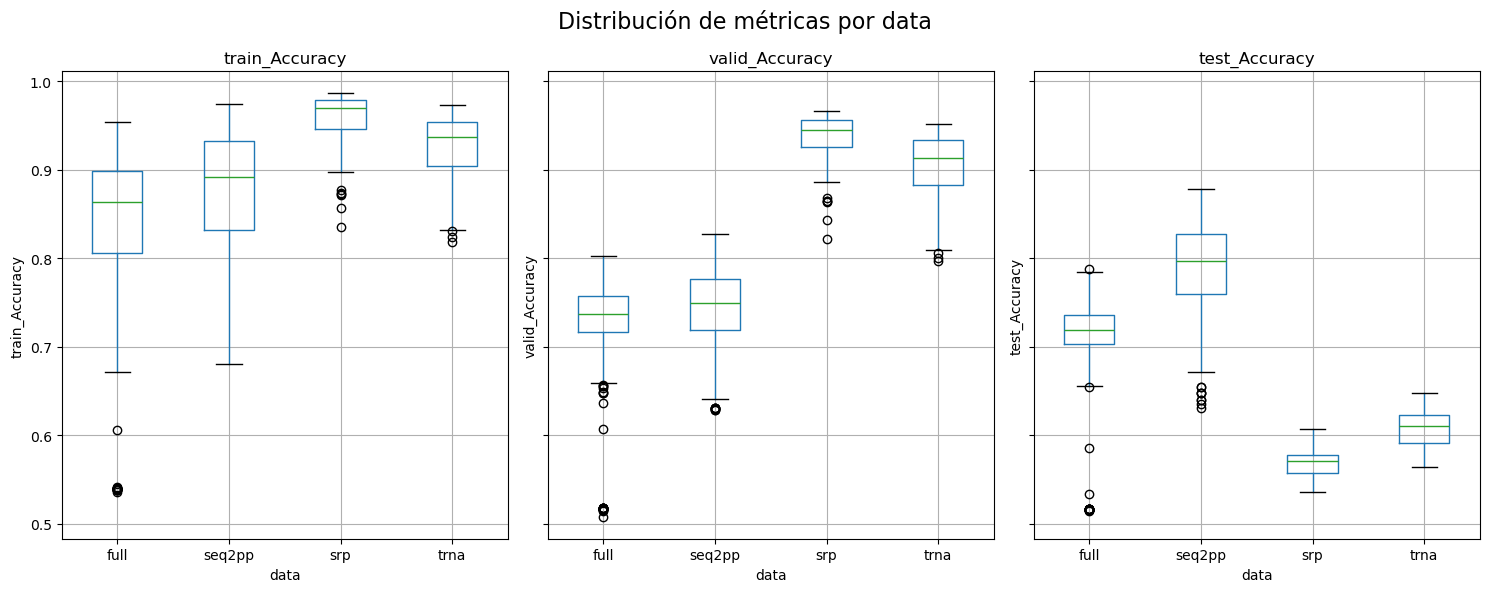

In [31]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):

    stats[metric] = df_all.groupby("data")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    df_all.boxplot(column=metric, by="data", ax=ax[i])
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por data", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

In [32]:
df_all['limit'] = 512

In [33]:
df_full.columns

Index(['run_name', 'exp', 'run', 'arc_features', 'arc_skip',
       'arc_encoder_blocks', 'arc_num_conv', 'arc_latent_volume',
       'arc_num_params', 'train_loss', 'valid_loss', 'test_loss', 'valid_F1',
       'train_F1', 'test_F1', 'train_Accuracy', 'valid_Accuracy',
       'test_Accuracy', 'train_Accuracy_seq', 'valid_Accuracy_seq',
       'test_Accuracy_seq'],
      dtype='object')

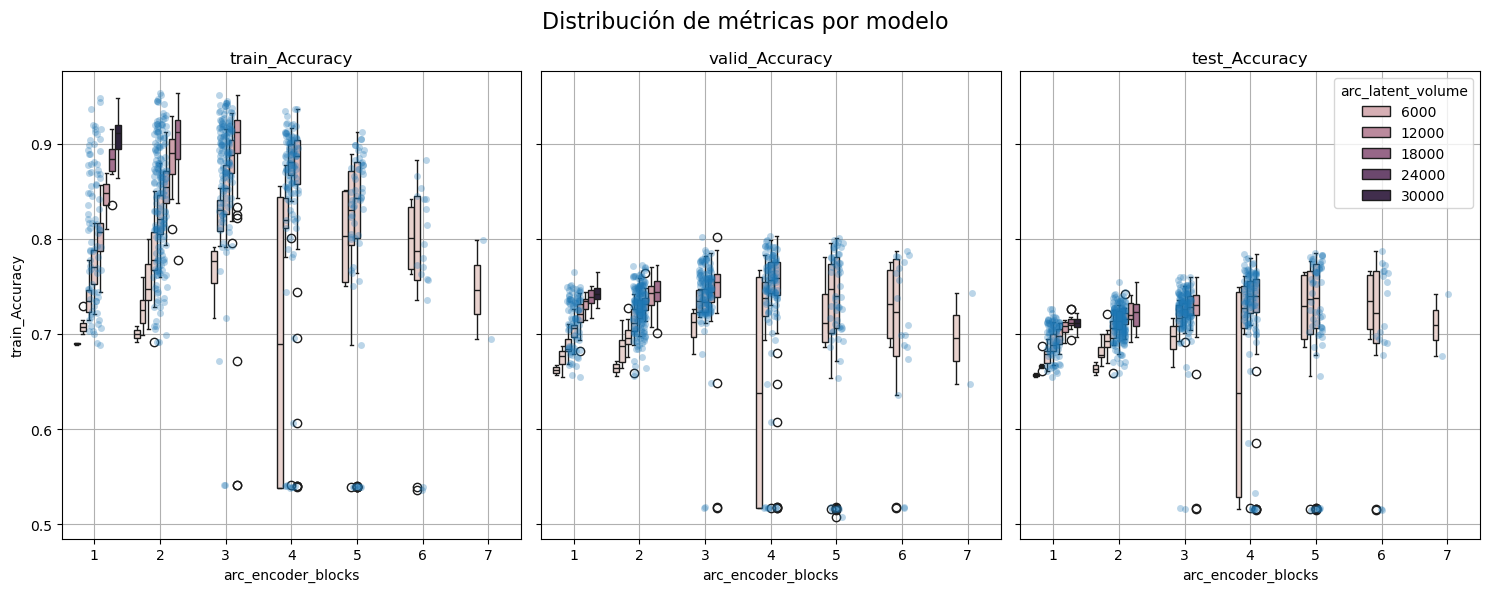

In [34]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_f, x="arc_encoder_blocks", y=metric, hue='arc_latent_volume',ax=ax[i], legend=legend)
    sns.stripplot(
        
        data=df_f, x="arc_encoder_blocks", y=metric, ax=ax[i],  alpha=0.3, legend=False ,    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

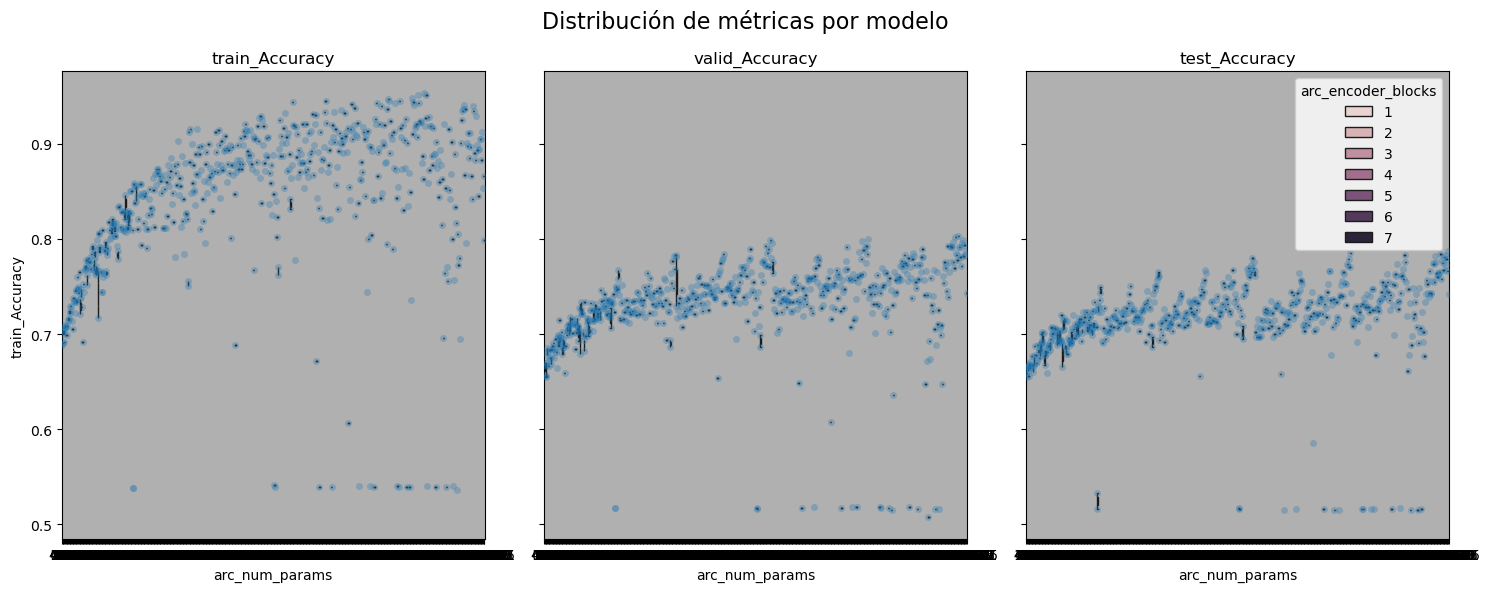

In [35]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_f, x="arc_num_params", y=metric, hue='arc_encoder_blocks',ax=ax[i], legend=legend)
    sns.stripplot(
        
        data=df_f, x="arc_num_params", y=metric, ax=ax[i],  alpha=0.3, legend=False ,    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

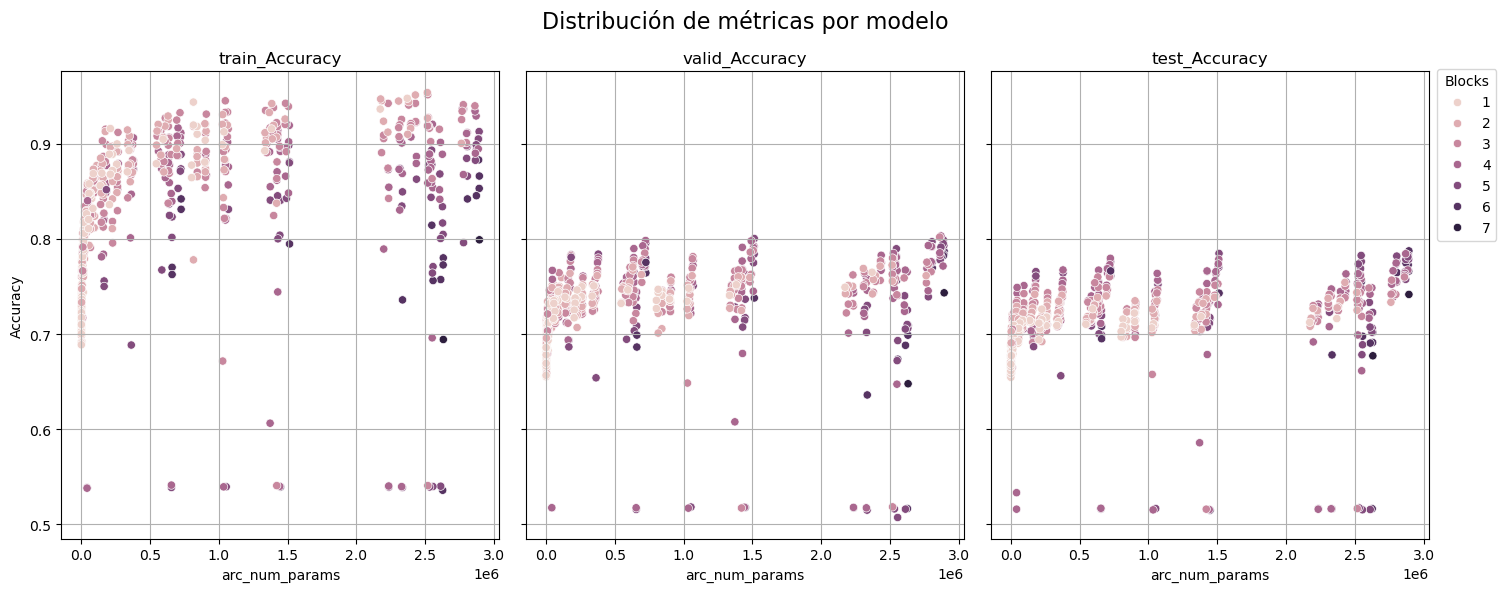

In [36]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.scatterplot(data=df_f, x="arc_num_params", y=metric, hue='arc_encoder_blocks',ax=ax[i], legend=legend)

         
    ax[i].grid()
    ax[i].set_title(f"{metric}")
ax[0].set_ylabel("Accuracy") 

ax[2].legend(bbox_to_anchor=(1.17,1.02), title='Blocks')
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

In [47]:
df_f.query('arc_encoder_blocks == 7')['arc_latent_volume']

593    512.0
594    512.0
Name: arc_latent_volume, dtype: float64

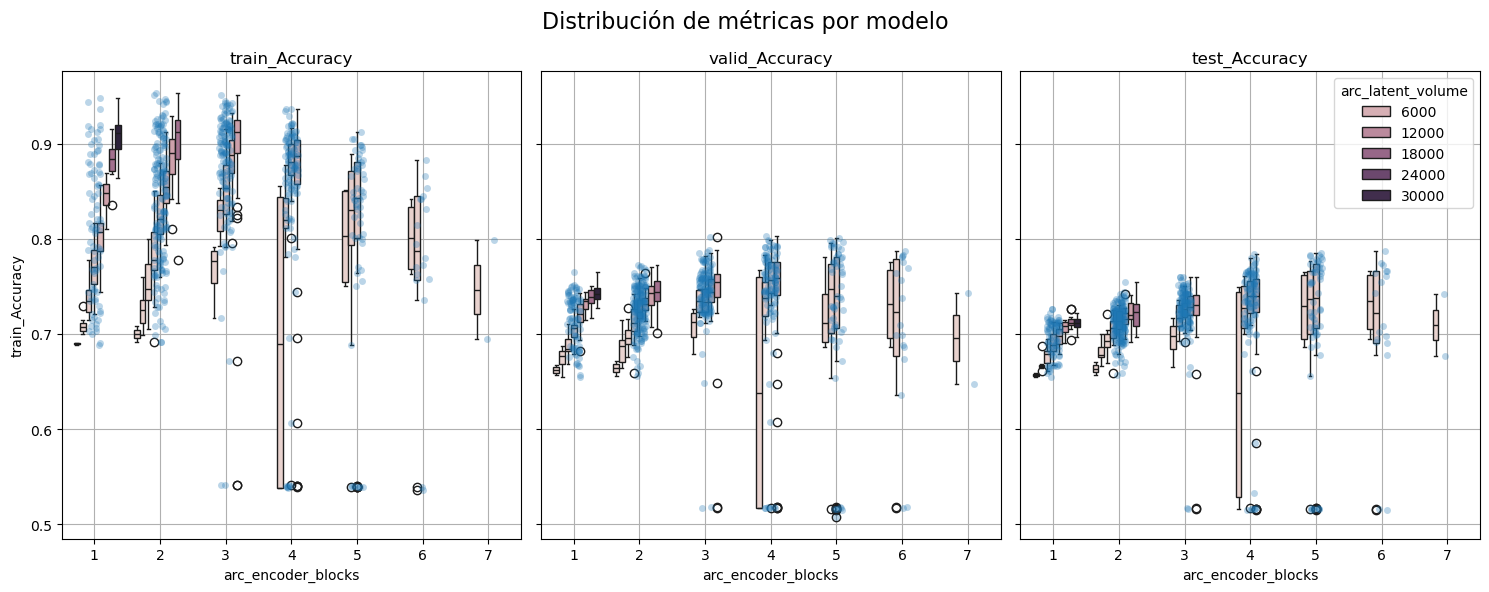

In [46]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_f, x="arc_encoder_blocks", y=metric, hue='arc_latent_volume',ax=ax[i], legend=legend)
    sns.stripplot(
        
        data=df_f, x="arc_encoder_blocks", y=metric, ax=ax[i],  alpha=0.3, legend=False ,    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

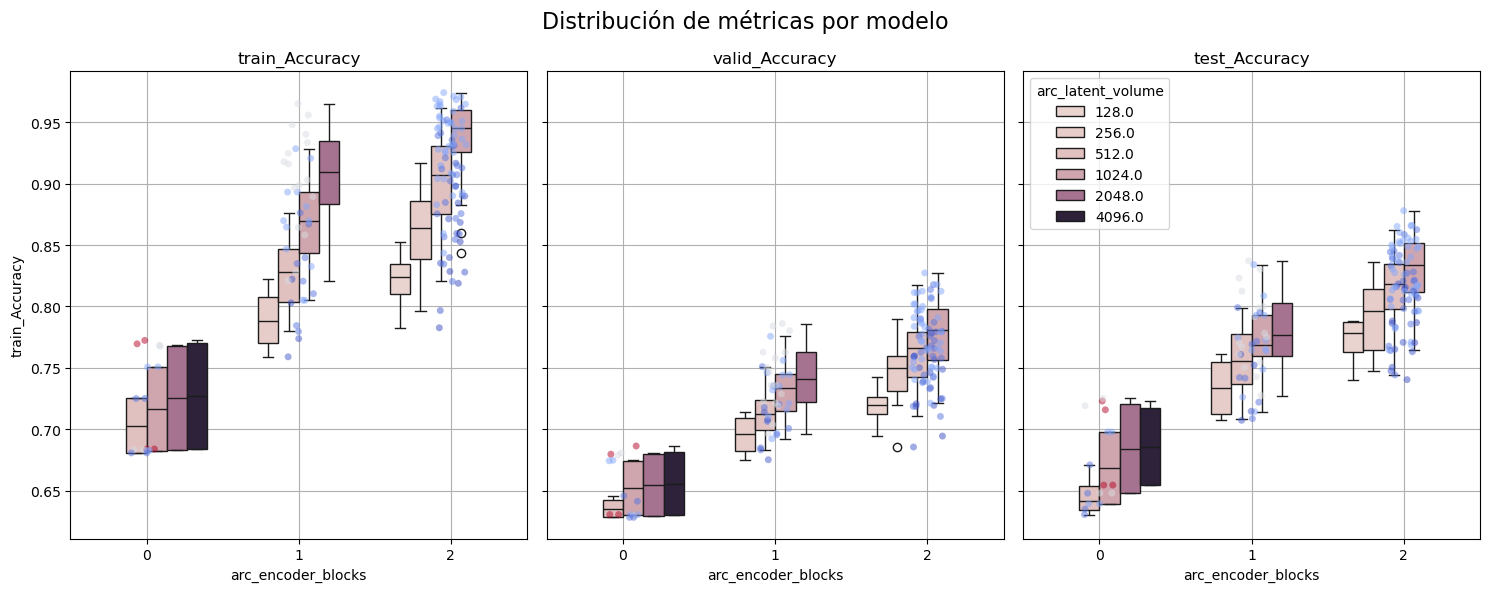

In [73]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_seq2pp, x="arc_encoder_blocks", y=metric, hue='arc_latent_volume',ax=ax[i], legend=legend)
    sns.stripplot(
        data=df_seq2pp, x="arc_encoder_blocks", y=metric, ax=ax[i], hue='arc_latent_volume', alpha=0.5, legend=False,palette='coolwarm'
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

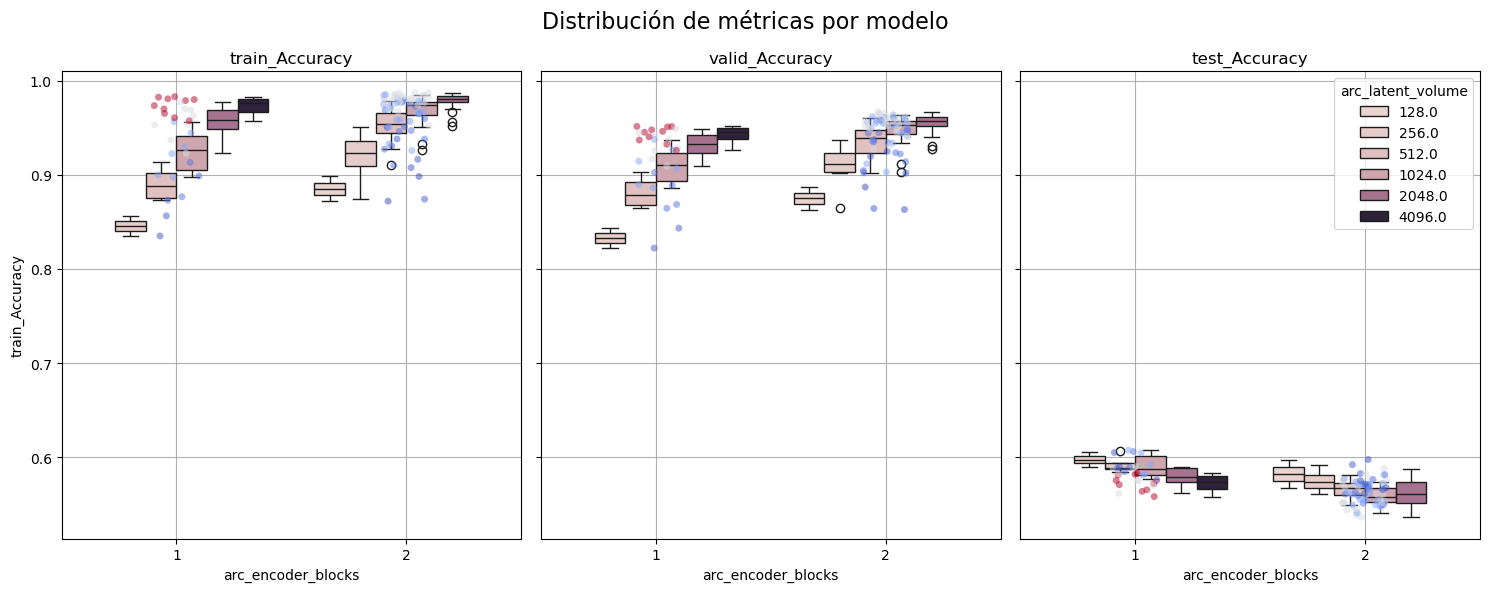

In [76]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_srp, x="arc_encoder_blocks", y=metric, hue='arc_latent_volume',ax=ax[i], legend=legend)
    sns.stripplot(
        data=df_srp, x="arc_encoder_blocks", y=metric, ax=ax[i], hue='arc_latent_volume', alpha=0.5, legend=False,palette='coolwarm'
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

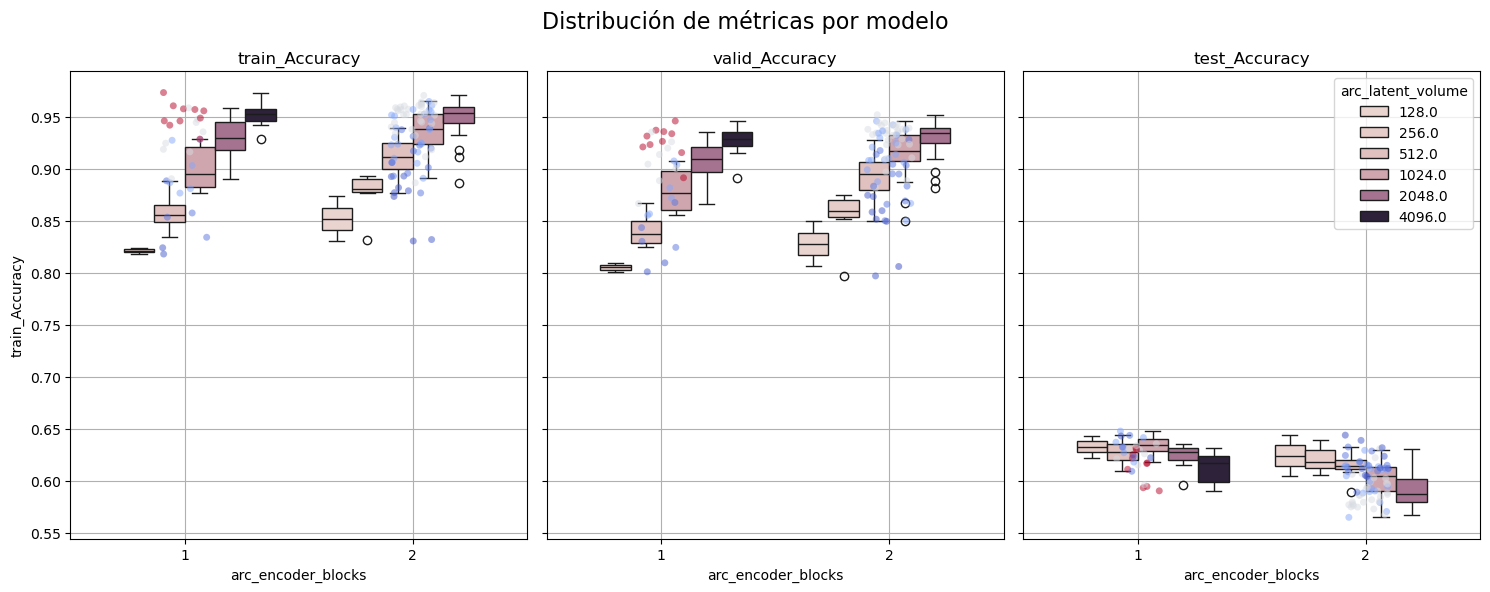

In [77]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True

    sns.boxplot(data=df_trna, x="arc_encoder_blocks", y=metric, hue='arc_latent_volume',ax=ax[i], legend=legend)
    sns.stripplot(
        data=df_trna, x="arc_encoder_blocks", y=metric, ax=ax[i], hue='arc_latent_volume', alpha=0.5, legend=False,palette='coolwarm'
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()                  